<a href="https://colab.research.google.com/github/palodavis/IA_regressao/blob/main/ClassificacaoAppThread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Avaliação do APP Threads





Atributos:

*   source: Google Play ou AppStore.
*   review_description: Comentário de avaliação.
*   rating: Atributo alvo, contendo as classes de avaliação - 1 até 5.
*   review_date: Data do comentário.

Objetivo:


*   Fazer a classificação do APP: Classes 1,2,3,4 e 5.
*   Rótulos: Avaliação do APP.




# Tratamento dos dados

In [ ]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carregar o dataset
df = pd.read_csv("threads_reviews.csv")
print(df.shape)
df.head()

(32910, 4)


,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [ ]:
#Checar os valores nulos
df.isna().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [ ]:
# informações básicas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,rating
count,32910.000000
mean,3.398481
std,1.751480
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


# Gráfico de Distribuição da loja de Apps: Apple Store e Google Play

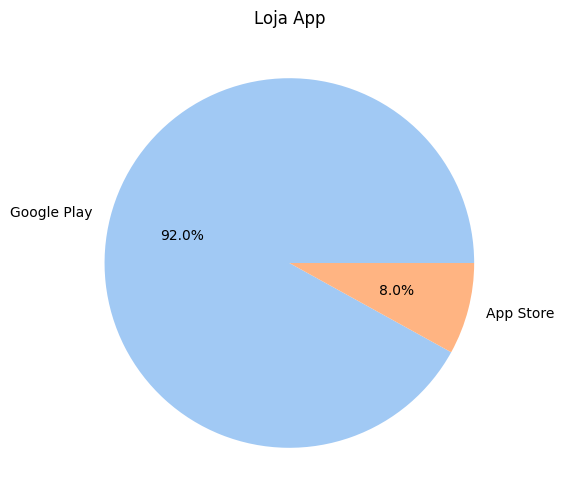

In [ ]:
source_counts = df['source'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Loja App')
plt.show()

# Gráfico de Avaliação - Verificando as classes desbanlaceadas do modelo

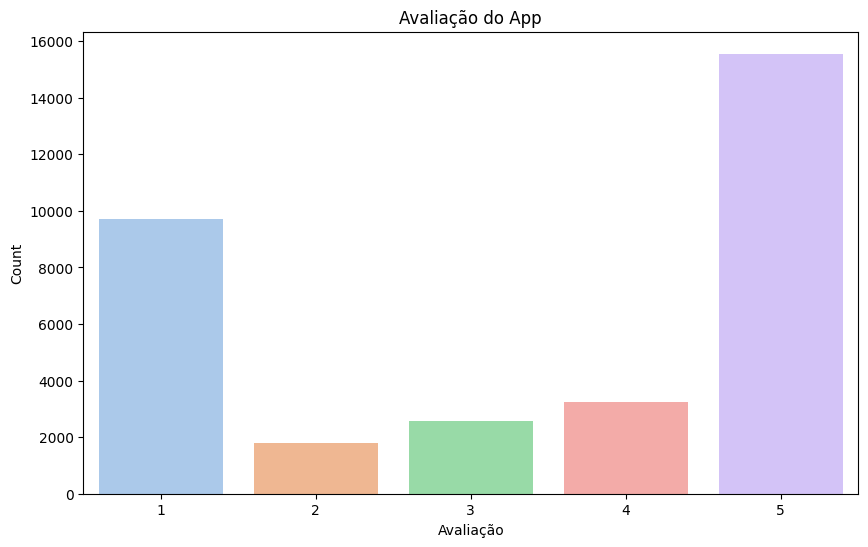

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='rating', data=df, palette='pastel')
plt.xlabel("Avaliação")
plt.ylabel("Count")
plt.title("Avaliação do App")
plt.show()

# Gráfico de Distribuição da classificação

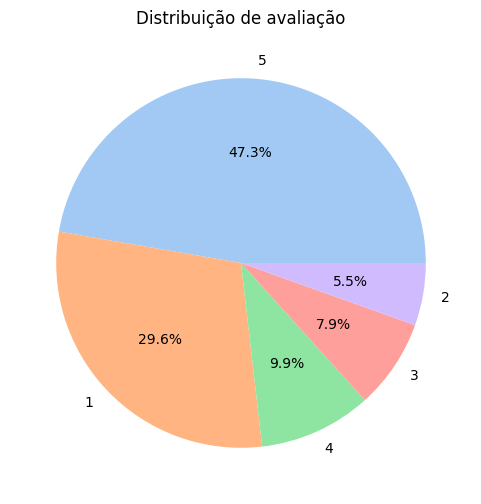

In [ ]:
rate = df["rating"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rate, labels=rate.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribuição de avaliação')
plt.show()

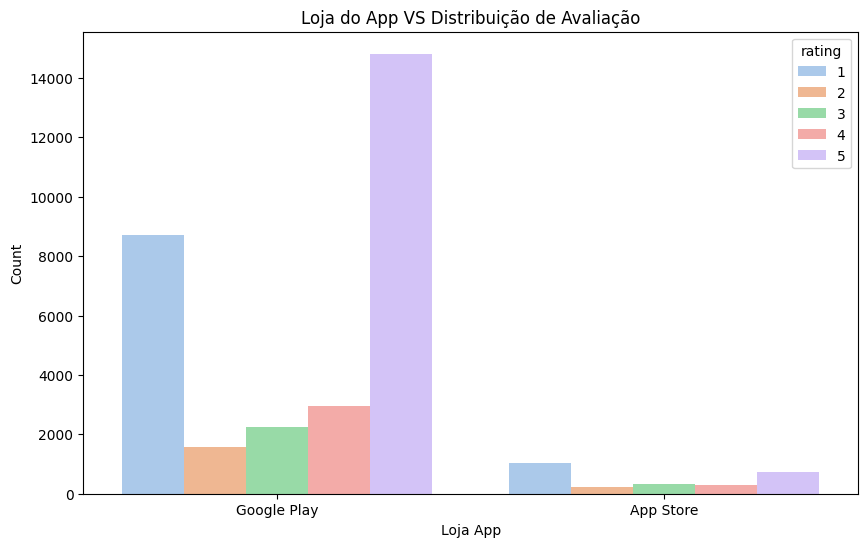

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x="source",hue='rating', data=df, palette='pastel')
plt.xlabel("Loja App")
plt.ylabel("Count")
plt.title("Loja do App VS Distribuição de Avaliação")
plt.show()

# Tratamento dos dados - One hot encondig para dados categóricos

In [ ]:
df["review_date"] = pd.to_datetime(df["review_date"])  # Converte a coluna para DateTime
df["day_name"] = df["review_date"].dt.day_name()
df.drop(["review_date"],axis=1,inplace=True)
df.head()

,source,review_description,rating,day_name
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,Saturday
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,Wednesday
2,Google Play,"For a brand new app, it's very well optimized....",3,Thursday
3,Google Play,"Great app with a lot of potential! However, th...",3,Monday
4,Google Play,"The app is good, but it needs a lot of functio...",3,Thursday


In [ ]:
# Converter as classes de avaliação
df['rating'] = df['rating'].map({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Verificar as classes convertidas
df['rating'].value_counts()

df.head()

,source,review_description,rating,day_name
0,Google Play,Meh. Not the greatest experience on a Chromebo...,1,Saturday
1,Google Play,Pretty good for a first launch!! Its easy to u...,2,Wednesday
2,Google Play,"For a brand new app, it's very well optimized....",2,Thursday
3,Google Play,"Great app with a lot of potential! However, th...",2,Monday
4,Google Play,"The app is good, but it needs a lot of functio...",2,Thursday


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Selecionar as colunas categóricas
categorical_columns = ["source", "day_name"]

# Criar um codificador one-hot
encoder = OneHotEncoder(sparse=False)

In [ ]:
# Ajustar e transformar as colunas categóricas
encoded_columns = encoder.fit_transform(df[categorical_columns])

# Obter os nomes das colunas codificadas
encoded_column_names = encoder.get_feature_names_out(input_features=categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Criar um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)

In [ ]:
# Concatenar as colunas codificadas ao DataFrame original
df_encoded = pd.concat([df, encoded_df], axis=1)

# Descartar as colunas originais categóricas
df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Visualizar o DataFrame resultante
df_encoded.head(10)

,review_description,rating,source_App Store,source_Google Play,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,Meh. Not the greatest experience on a Chromebo...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Pretty good for a first launch!! Its easy to u...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"For a brand new app, it's very well optimized....",2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,"Great app with a lot of potential! However, th...",2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,"The app is good, but it needs a lot of functio...",2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,"Currently, it's very challenging to use. It's ...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,I still don’t want to see content from people ...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,Could be great if all pages loaded when you cl...,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,I'm liking the concept! There is room for impr...,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,Not bad! This is its first launch. There is st...,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# WorldCloud

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

sns.set(style="whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

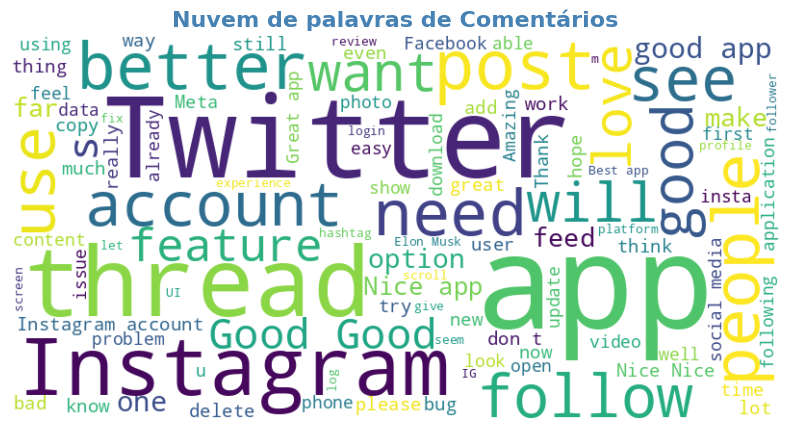

In [ ]:
text = ' '.join(df['review_description'])

custom_color_map = plt.cm.viridis

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_color_map,
                      max_words=100, contour_width=3, contour_color='steelblue').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de palavras de Comentários', fontsize=16, fontweight='bold', color='steelblue')
plt.show()

#Bag-of-words


Primeiramente iremos fazer uma análise aplicando bag-of-words e verificando as palavras que aparecem com mais frequência

Bag-of-words:

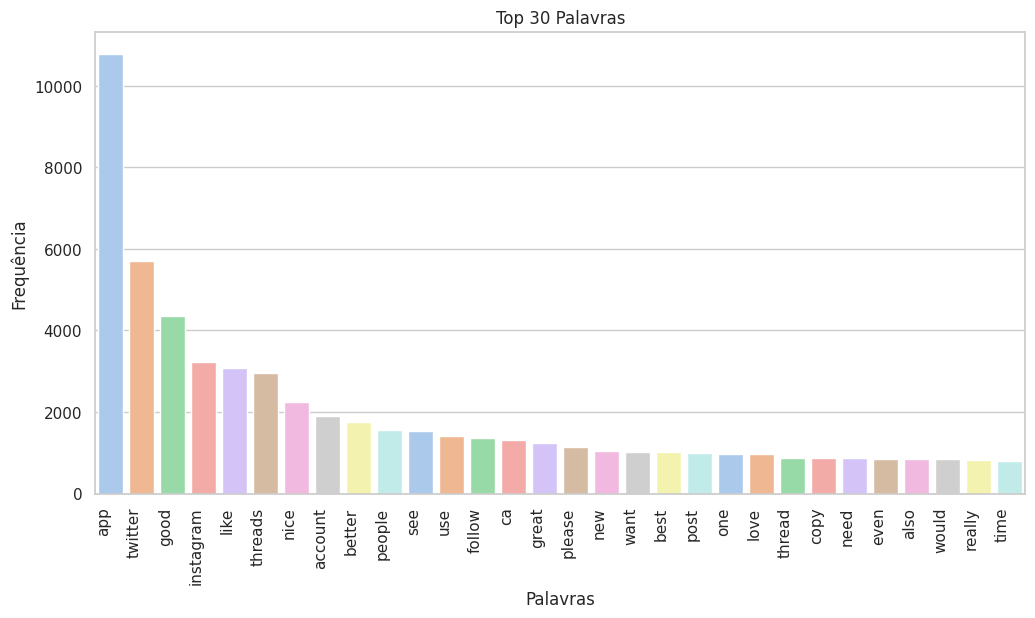

In [ ]:
#Remover palavras stop-words
def process(text):
    words = word_tokenize(text.lower())      # Lower case
    stop_words = set(stopwords.words('english'))   # stopwords in text
    words = [word for word in words if word.isalpha() and word not in stop_words]   # condition alphabet only and no stop words
    return words

reviews = ' '.join(df["review_description"])    # join data combine all reviews

data = process(reviews)
words = Counter(data)

#df['review_description'] = df['review_description'].apply(process)

# Verificar as top 30 palavras mais utilizadas
plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, count in words.most_common(30)], y=[count for word, count in words.most_common(30)],palette='pastel')
plt.title('Top 30 Palavras')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=90, ha='right')
plt.show()

# Pre processamento

In [ ]:
#Treinamento do modelo
from sklearn.model_selection import train_test_split
X = df_encoded['review_description']
y= df_encoded['rating']

#70% de treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Testando com lemmatizer


In [ ]:
import nltk
from nltk.corpus import stopwords

# Remove as palavras de parada (stop words) de cada notícia
stop_words = set(stopwords.words('english'))
df['news_no_stopwords'] = df['review_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df['news_no_stopwords']

0        Meh. Not greatest experience Chromebook. Seems...
1        Pretty good first launch!! Its easy use self-e...
2        For brand new app, well optimized. However mis...
3        Great app lot potential! However, lot needs fi...
4        The app good, needs lot functionality. For exa...
                               ...                        
32905    This killed dog. Mark zuckerburg strangled him...
32906                    Add Search hashtag like Twitter !
32907                                          bad twister
32908                              Yet another trash Meta.
32909                     Nothing special app copy twitter
Name: news_no_stopwords, Length: 32910, dtype: object

In [ ]:
#total de palavras ANTES das stopwords
df['review_description'].str.split().apply(len)

0        85
1        81
2        91
3        94
4        79
         ..
32905    12
32906     7
32907     2
32908     5
32909    10
Name: review_description, Length: 32910, dtype: int64

In [ ]:
#total de palavras DEPOIS das stopwords
df['news_no_stopwords'].str.split().apply(len)

0        48
1        53
2        56
3        54
4        46
         ..
32905    10
32906     6
32907     2
32908     4
32909     5
Name: news_no_stopwords, Length: 32910, dtype: int64

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Reduz as palavras em cada notícia para sua forma canônica (lemmatization)
lemmatizer = WordNetLemmatizer()
df['news_lemmatized'] = df['news_no_stopwords'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['news_lemmatized'], df['rating'], test_size=0.3)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
train_features = tfidf_vectorizer.fit_transform(X_train)
test_features = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
# Crie  dicionário com os resultadosum
from sklearn.linear_model import LogisticRegression
model_l1 = LogisticRegression()
model_l1.fit(train_features,y_train)

previsoes_l1 = model_l1.predict(test_features)
previsoes_l1

accuracy_score(y_test, previsoes_l1),

(0.7998581991289375,)

#TF - IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Instanciar o objeto TF-IDF
vectorizer = TfidfVectorizer()

In [ ]:
# Constroi o vetorizador nos dados
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
#Imprimir o vocabulário
print(vectorizer.vocabulary_)

{'try': 11912, 'first': 4401, 'make': 7233, 'review': 9831, 'this': 11561, 'app': 819, 'great': 4996, 'except': 4032, 'activity': 390, 'section': 10232, 'doesnt': 3462, 'load': 7034, 'place': 8880, 'connect': 2579, 'basically': 1294, 'way': 12651, 'better': 1461, 'le': 6844, 'racist': 9409, 'transphobic': 11834, 'white': 12730, 'man': 7269, 'driven': 3569, 'version': 12440, 'twitter': 12006, 'lol': 7068, 'good': 4927, 'experience': 4089, 'sairam': 10048, 'hope': 5438, 'provide': 9273, 'future': 4676, 'for': 4523, 'joined': 6295, 'threads': 11598, 'get': 4804, 'alternative': 650, 'may': 7397, 'interest': 5949, 'instagram': 5872, 'itself': 6126, 'however': 5476, 'create': 2782, 'account': 346, 'login': 7057, 'existing': 4064, 'one': 8330, 'that': 11488, 'sort': 10774, 'unwelcoming': 12245, 'mean': 7417, 'would': 12855, 'download': 3518, 'seems': 10252, 'like': 6957, 'unnecessary': 12196, 'step': 10938, 'effort': 3698, 'elon': 3753, 'musk': 7834, 'if': 5583, 'want': 12605, 'told': 11735, 

In [ ]:
#Matriz de pontuação do IDF
print(vectorizer.idf_)

[10.35175312  9.65860594 10.35175312 ... 10.35175312 10.35175312
 10.35175312]


# PCA (Principal components analisys)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Padronizar os dados
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape

(23037,)

In [ ]:
# Crie uma instância do PCA com o número de componentes desejado
pca = PCA(n_components=100)

# Ajuste o PCA aos dados de treinamento e aplique a transformação
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Criar um scatter plot dos dados de treinamento projetados no espaço PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')

# Adicionar rótulos com cores e nomes das classes
classes = np.unique(y_train)
class_names = ['Classe 1: Negativo', 'Classe 2: Neutro', 'Classe 3: Positivo']  # Substitua pelos nomes reais das suas classes
class_colors = [scatter.cmap(scatter.norm(c)) for c in classes]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name) for color, name in zip(class_colors, class_names)]
plt.legend(handles=handles, title='Classes')

plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('PCA - Redução de Dimensionalidade')

plt.show()


In [ ]:
print("Auto-valores:")
print(pca.explained_variance_)
print()

print("Auto-vetores:")
print(pca.components_)
print()

print("Variância explicada:")
print(pca.explained_variance_ratio_)
print()

In [ ]:
#Tempo de treino com PCA
from sklearn.tree import DecisionTreeClassifier
import time
#Fazer o cálculo de entropia
arvore = DecisionTreeClassifier(criterion='entropy')
start_time = time.perf_counter()
arvore.fit(X_train_pca, y_train)
end_time = time.perf_counter()

print("Tempo de treino", end_time - start_time)

In [ ]:
#Tempo de treino sem PCA
from sklearn.tree import DecisionTreeClassifier
import time
#Fazer o cálculo de entropia
arvore = DecisionTreeClassifier(criterion='entropy')
start_time = time.perf_counter()
arvore.fit(X_train_tfidf, y_train)
end_time = time.perf_counter()

print("Tempo de treino", end_time - start_time)

Tempo de treino 14.41433128999995


# Regressão Logística

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
# Aplicar 3 técnicas de regularizção; 'tol': [0.0001, 0.00001, 0.000001],
            #  'C': [1.0, 1.5, 2.0],
            # 'solver': ['lbfgs', 'sag', 'saga']
#model = LogisticRegression(tol=0.0001, C=0.5, solver='lbfgs')
#model.fit(X_train_tfidf,y_train)
#y_pred = model.predict(X_test_tfidf)
#y_pred_proba = model.predict_proba(X_test_tfidf)

In [ ]:
# Regularização L1 (Lasso)
model_l1 = LogisticRegression(penalty='l1', C=1.0, solver='saga')
model_l1.fit(X_train_tfidf, y_train)

# Regularização L2 (Ridge)
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
model_l2.fit(X_train_tfidf, y_train)

# Elastic Net Regularization
model_elastic_net = LogisticRegression(penalty='elasticnet', C=1.0, solver='saga', l1_ratio=0.5)
model_elastic_net.fit(X_train_tfidf,y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
previsoes_l1 = model_l1.predict(X_test_tfidf)
previsoes_l1

previsoes_l2 = model_l2.predict(X_test_tfidf)
previsoes_l2

previsoes_elastic = model_elastic_net.predict(X_test_tfidf)
previsoes_elastic

array([3, 1, 3, ..., 1, 1, 1])

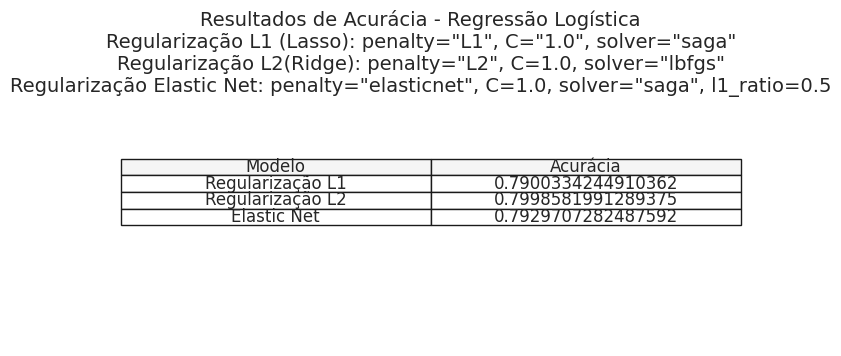

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
# Crie um dicionário com os resultados
results = {
    'Modelo': ['Regularização L1', 'Regularização L2', 'Elastic Net'],
    'Acurácia': [
        accuracy_score(y_test, previsoes_l1),
        accuracy_score(y_test, previsoes_l2),
        accuracy_score(y_test, previsoes_elastic)
    ]
}

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center', colColours=['#f5f5f5']*results_df.shape[1])

fig.suptitle('Resultados de Acurácia - Regressão Logística\nRegularização L1 (Lasso): penalty="L1", C="1.0", solver="saga"\nRegularização L2(Ridge): penalty="L2", C=1.0, solver="lbfgs"\nRegularização Elastic Net: penalty="elasticnet", C=1.0, solver="saga", l1_ratio=0.5', fontsize=14, y=0.95)
plt.show()

0.7998581991289375

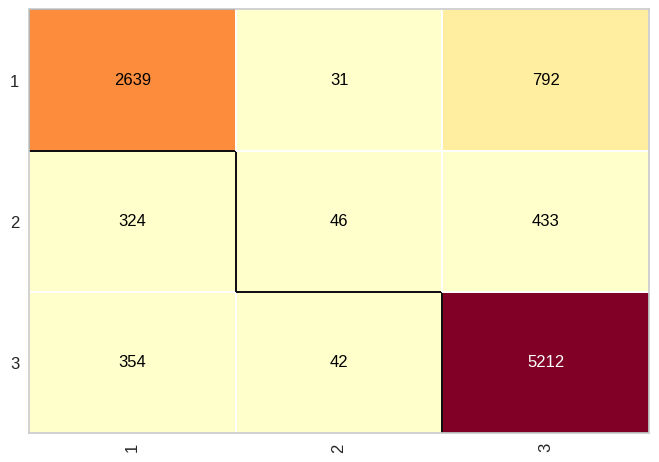

In [ ]:
# Verifcar os erros e acertos
# Modelo 1 e modelo 5 acertaram muito
# Modelo 4 obteve muitos erros
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_l2)
cm.fit(X_train_tfidf, y_train)
cm.score(X_test_tfidf, y_test)

In [ ]:
from sklearn.metrics import f1_score
# Micro F1
micro_f1 = f1_score(y_test, previsoes_l2, average='micro')

# Macro F1
macro_f1 = f1_score(y_test, previsoes_l2, average='macro')
print(f"Micro F1: {micro_f1}")
print(f"Macro F1: {macro_f1}")

Micro F1: 0.7998581991289375
Macro F1: 0.5812617761844673


In [ ]:
# Relatório da classificação
# Observar o recall, a classe 1 e 5 aprende muito bem, enquanto de 2 a 4 o recall é baixo
# Percebe as classes desbanlaceadas
print(classification_report(y_test, previsoes_l2))

              precision    recall  f1-score   support

           1       0.80      0.76      0.78      3462
           2       0.39      0.06      0.10       803
           3       0.81      0.93      0.87      5608

    accuracy                           0.80      9873
   macro avg       0.66      0.58      0.58      9873
weighted avg       0.77      0.80      0.77      9873



# Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Parâmetros a ser ajustados
#parametros = {'criterion': ['gini', 'entropy'],
#              'splitter': ['best', 'random'],
#              'min_samples_split': [2, 5, 10],
#              'min_samples_leaf': [1, 5, 10]}

#Árvores de decisão não é aplicável a regularização com L1, L2 e ElasticNet. Desta forma, utilizar outras forma de realizar a regularização


In [ ]:
#Criterion 1 utilizando gini
arvore1 = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf= 10, min_samples_split= 2, splitter= 'random')
arvore1.fit(X_train_tfidf,y_train)
y_pred1 = arvore1.predict(X_test_tfidf)
y_pred1_proba = arvore1.predict_proba(X_test_tfidf)

#Criterion 2 utilizando Entropy
arvore2 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf= 1, min_samples_split= 5, splitter= 'best')
arvore2.fit(X_train_tfidf,y_train)
y_pred = arvore2.predict(X_test_tfidf)
y_pred_proba = arvore2.predict_proba(X_test_tfidf)

#Criterion 3
arvore3 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf= 5, min_samples_split= 10, splitter= 'random')
arvore3.fit(X_train_tfidf,y_train)
y_pred = arvore3.predict(X_test_tfidf)
y_pred_proba = arvore3.predict_proba(X_test_tfidf)

In [ ]:
previsoes1 = arvore1.predict(X_test_tfidf)
previsoes1

previsoes2 = arvore2.predict(X_test_tfidf)
previsoes2

previsoes3 = arvore3.predict(X_test_tfidf)
previsoes3

array([3, 1, 3, ..., 3, 1, 1])

In [ ]:
arvore1.classes_

array([1, 2, 3])

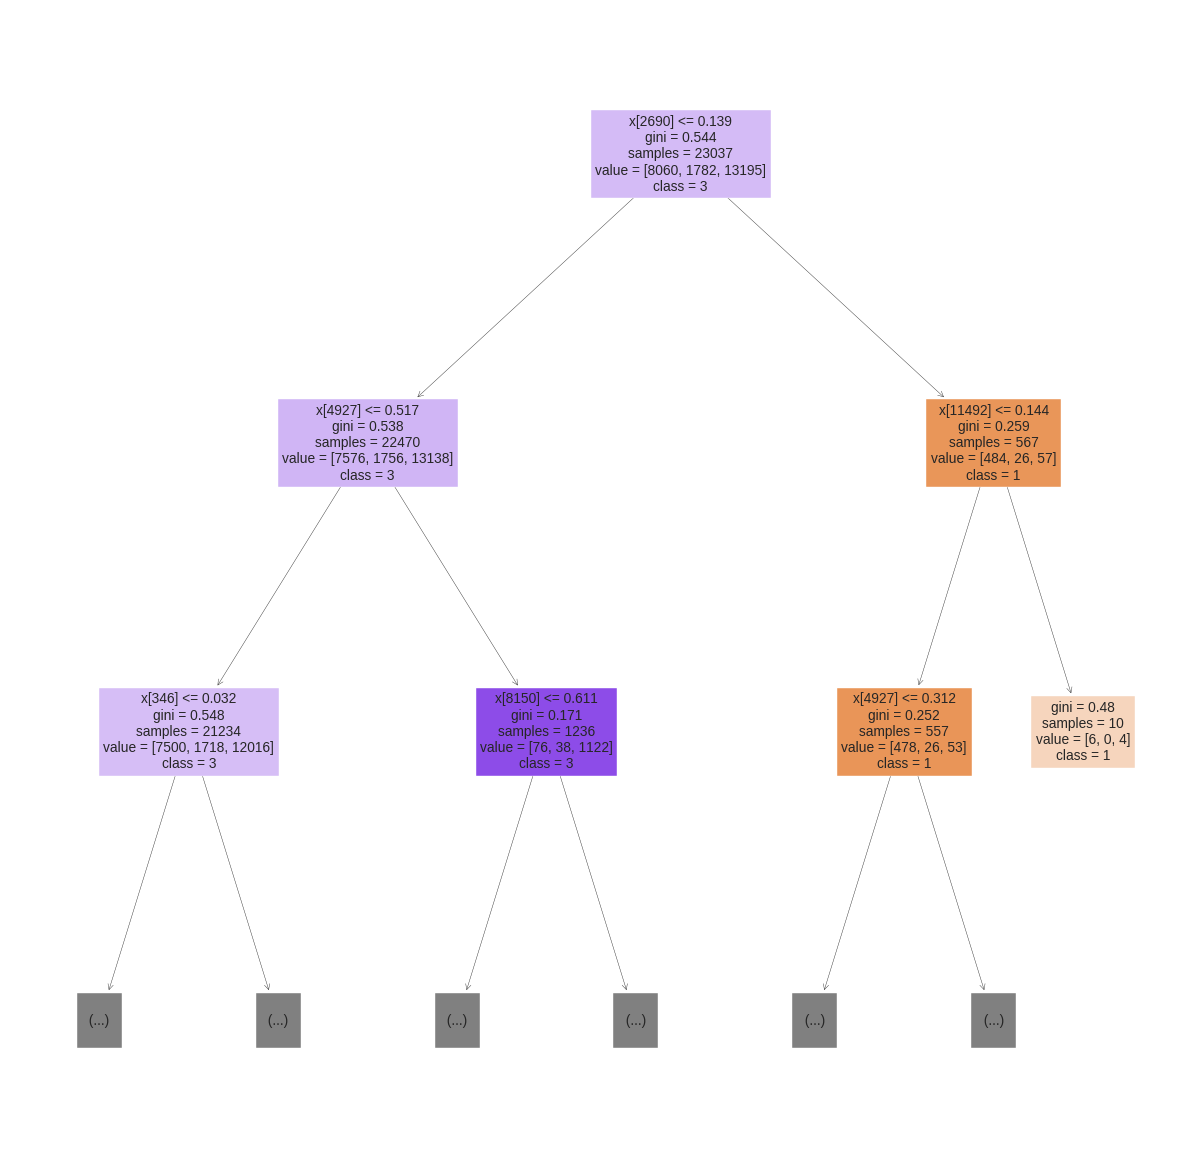

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

# Converter as classes em 'arvore.classes_' para uma lista de strings
class_names = [str(class_name) for class_name in arvore1.classes_]

# Limite a profundidade da árvore ao plotar
max_depth = 2 # limite de profundidade desejado
tree.plot_tree(arvore1, class_names=class_names, filled=True, max_depth=max_depth)
fig.savefig('arvore.png')


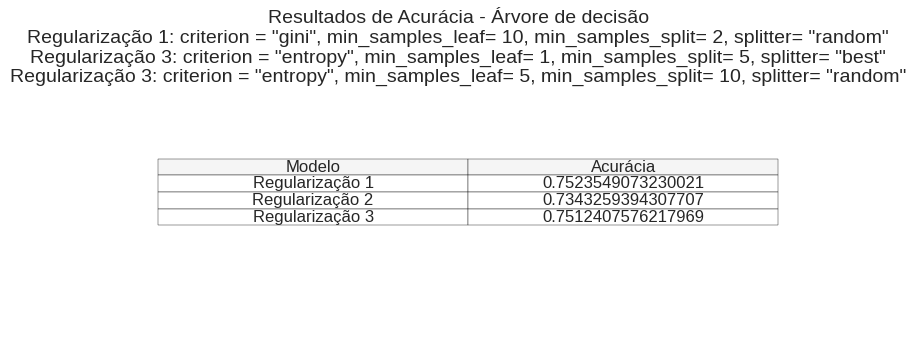

In [ ]:
# Crie um dicionário com os resultados
results = {
    'Modelo': ['Regularização 1', 'Regularização 2', 'Regularização 3'],
    'Acurácia': [
        accuracy_score(y_test, previsoes1),
        accuracy_score(y_test, previsoes2),
        accuracy_score(y_test, previsoes3)
    ]
}

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center', colColours=['#f5f5f5']*results_df.shape[1])

fig.suptitle('Resultados de Acurácia - Árvore de decisão\nRegularização 1: criterion = "gini", min_samples_leaf= 10, min_samples_split= 2, splitter= "random"\nRegularização 3: criterion = "entropy", min_samples_leaf= 1, min_samples_split= 5, splitter= "best"\nRegularização 3: criterion = "entropy", min_samples_leaf= 5, min_samples_split= 10, splitter= "random"', fontsize=14, y=0.95)
plt.show()

In [ ]:
from sklearn.metrics import f1_score
# Micro F1
micro_f1 = f1_score(y_test, previsoes1, average='micro')

# Macro F1
macro_f1 = f1_score(y_test, previsoes1, average='macro')
print(f"Micro F1: {micro_f1}")
print(f"Macro F1: {macro_f1}")

Micro F1: 0.7523549073230021
Macro F1: 0.5366808395926723


0.7523549073230021

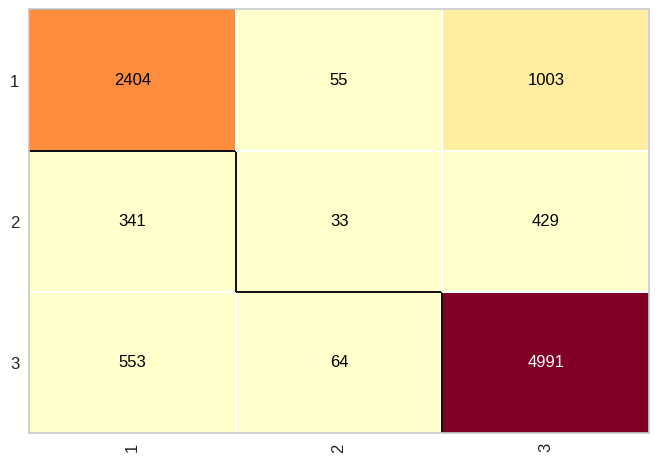

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore1)
cm.fit(X_train_tfidf, y_train)
cm.score(X_test_tfidf, y_test)

In [ ]:
print(classification_report(y_test, previsoes1))

              precision    recall  f1-score   support

           1       0.73      0.69      0.71      3462
           2       0.22      0.04      0.07       803
           3       0.78      0.89      0.83      5608

    accuracy                           0.75      9873
   macro avg       0.57      0.54      0.54      9873
weighted avg       0.71      0.75      0.73      9873



In [ ]:
#parametros = {'criterion': ['gini', 'entropy'],
#              'splitter': ['best', 'random'],
#              'min_samples_split': [2, 5, 10],
#              'min_samples_leaf': [1, 5, 10]}

#grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
#grid_search.fit(X_train_tfidf, y_train)
#melhores_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_
#print(melhores_parametros)
#print(melhor_resultado)

# Gradiente descendente com Regressão Logística


In [ ]:
from sklearn.linear_model import SGDClassifier

# Instanciar o SGDClassifier para Regressão Logística com regularização L1
sgd_classifier_l1 = SGDClassifier(loss='log', alpha=0.0001, max_iter=1000, random_state=42, penalty='l1')
# Instanciar o SGDClassifier para Regressão Logística com regularização L2 (Ridge)
sgd_classifier_l2 = SGDClassifier(loss='log', alpha=0.0001, max_iter=1000, random_state=42, penalty='l2')
# Instanciar o SGDClassifier para Regressão Logística com regularização Elastic Net
sgd_classifier_elastic = SGDClassifier(loss='log', alpha=0.0001, max_iter=1000, random_state=42, penalty='elasticnet', l1_ratio=0.5)

In [ ]:
# Treinar o modelo com seus dados de treinamento
sgd_classifier_l1.fit(X_train_tfidf, y_train)
# Treinar o modelo com seus dados de treinamento
sgd_classifier_l2.fit(X_train_tfidf, y_train)
# Treinar o modelo com seus dados de treinamento
sgd_classifier_elastic.fit(X_train_tfidf, y_train)

SGDClassifier(l1_ratio=0.5, loss='log', penalty='elasticnet', random_state=42)

In [ ]:
# Fazer previsões nos dados de teste
predicted_classes_l1 = sgd_classifier_l1.predict(X_test_tfidf)
# Fazer previsões nos dados de teste
predicted_classes_l2 = sgd_classifier_l2.predict(X_test_tfidf)
# Fazer previsões nos dados de teste
predicted_classes_elastic = sgd_classifier_elastic.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Avaliar o modelo com regularização L1
accuracy_l1 = accuracy_score(y_test, predicted_classes_l1)
report_l1 = classification_report(y_test, predicted_classes_l1)
# Avaliar o modelo com regularização L2
accuracy_l2 = accuracy_score(y_test, predicted_classes_l2)
report_l2 = classification_report(y_test, predicted_classes_l2)
# Avaliar o modelo com regularização Elastic Net
accuracy_elastic = accuracy_score(y_test, predicted_classes_elastic)
report_elastic = classification_report(y_test, predicted_classes_elastic)

In [ ]:
print(report_l2)

              precision    recall  f1-score   support

           1       0.79      0.74      0.76      3462
           2       0.39      0.02      0.03       803
           3       0.79      0.94      0.86      5608

    accuracy                           0.79      9873
   macro avg       0.66      0.56      0.55      9873
weighted avg       0.76      0.79      0.76      9873



Regularização L1:
Acurácia: 0.7810189405449205

Regularização L2 (Ridge):
Acurácia: 0.7925655829028664

Regularização Elastic Net:
Acurácia: 0.7866909753874203


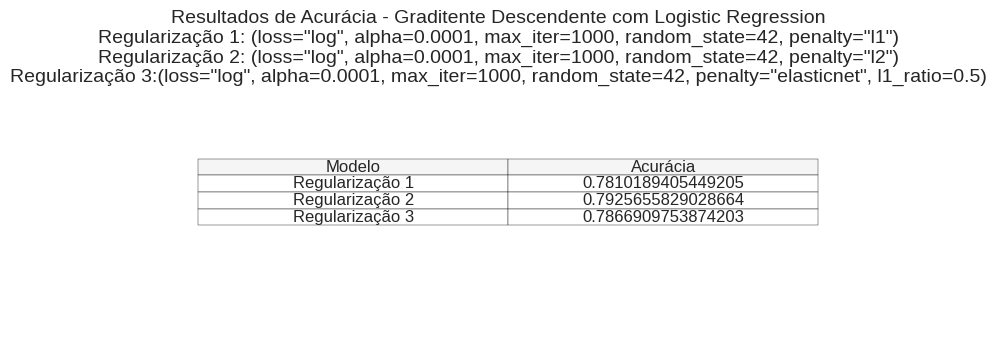

In [ ]:
print('Regularização L1:')
print(f'Acurácia: {accuracy_l1}')

print('\nRegularização L2 (Ridge):')
print(f'Acurácia: {accuracy_l2}')

print('\nRegularização Elastic Net:')
print(f'Acurácia: {accuracy_elastic}')

# Crie um dicionário com os resultados
results = {
    'Modelo': ['Regularização 1', 'Regularização 2', 'Regularização 3'],
    'Acurácia': [
        accuracy_l1,
        accuracy_l2,
        accuracy_elastic
    ]
}

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center', colColours=['#f5f5f5']*results_df.shape[1])

fig.suptitle('Resultados de Acurácia - Graditente Descendente com Logistic Regression\nRegularização 1: (loss="log", alpha=0.0001, max_iter=1000, random_state=42, penalty="l1")\nRegularização 2: (loss="log", alpha=0.0001, max_iter=1000, random_state=42, penalty="l2")\nRegularização 3:(loss="log", alpha=0.0001, max_iter=1000, random_state=42, penalty="elasticnet", l1_ratio=0.5)', fontsize=14, y=0.95)
plt.show()

0.7925655829028664

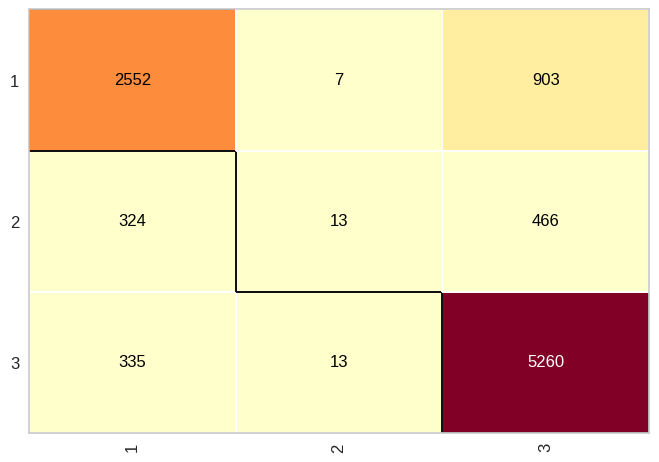

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(sgd_classifier_l2)
cm.fit(X_train_tfidf, y_train)
cm.score(X_test_tfidf, y_test)

In [ ]:
from sklearn.metrics import f1_score
# Micro F1
micro_f1 = f1_score(y_test, predicted_classes_l2, average='micro')

# Macro F1
macro_f1 = f1_score(y_test, predicted_classes_l2, average='macro')
print(f"Micro F1: {micro_f1}")
print(f"Macro F1: {macro_f1}")

Micro F1: 0.7925655829028664
Macro F1: 0.5518872269173599


In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
#parametros = {
#              'random_state': [0,42,100],
#              'alpha': [0.0001, 0.00001, 0.000001],
#              'max_iter': [100, 1000, 10000]}

#grid_search = GridSearchCV(estimator=SGDClassifier(), param_grid=parametros)
#grid_search.fit(X_train_tfidf, y_train)
#melhores_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_
#print(melhores_parametros)
#print(melhor_resultado)

#Análise de Overfitting e Underfitting com Curvas de Aprendizado




*   Overfitting: dados de treino, o modelo tem um desempenho excelente, porém quando utilizamos os dados de teste o resultado é ruim.
*   Uderfitting: Neste cenário o desempenho do modelo já é ruim no próprio treinamento. O modelo não consegue encontrar relações entre as variáveis e o teste nem precisa acontecer. Este modelo já pode ser descartado, pois não terá utilidade.



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score

In [ ]:
def predict(model,model_name):
    model.fit(X_train_tfidf,y_train)
    y_pred = model.predict(X_test_tfidf)
    y_pred_proba = model.predict_proba(X_test_tfidf)

    roc_auc = roc_auc_score(y_test,y_pred_proba, multi_class='ovr')
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred, average='weighted')
    f1 = f1_score(y_test,y_pred, average='weighted')
    print()
    print(model_name)
    print()

    plt.figure(figsize=(9, 6))

    colors = sns.color_palette('Set1', n_colors=3)
    for i in range(3):  # Assuming there are 3 classes (ratings 1 to 3)
        fpr, tpr, _ = roc_curve(y_test == (i + 1), y_pred_proba[:, i])
        roc_auc_curve = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=colors[i], label=f'Rating {i+1}, AUC = {roc_auc_curve:.2f}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='dotted', alpha=0.7)
    plt.gca().set_facecolor('#f9f9f9')
    plt.tick_params(axis='x', colors='#666666')
    plt.tick_params(axis='y', colors='#666666')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.grid(color='#999999', linestyle='dotted')

    plt.show()


Logistic Regression



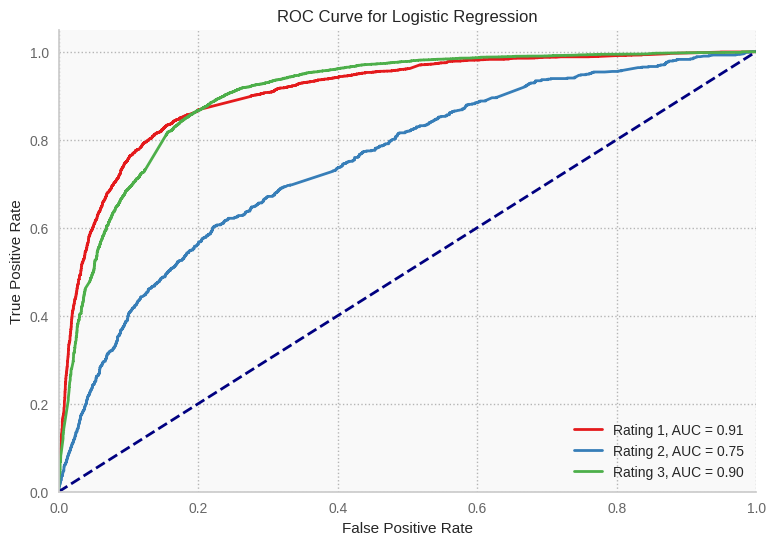

In [ ]:
log_reg = LogisticRegression()
predict(log_reg, 'Logistic Regression')


Tree Decision



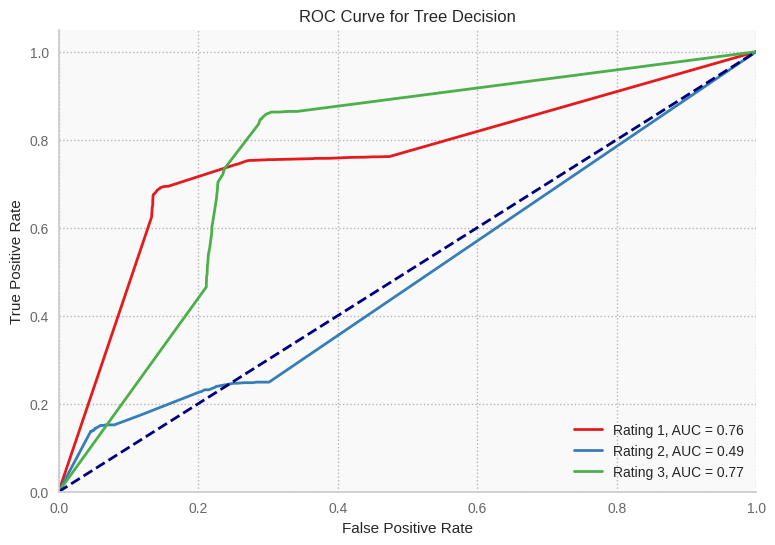

In [ ]:
arvore = DecisionTreeClassifier()
predict(arvore, 'Tree Decision')


Gradiente Descendente



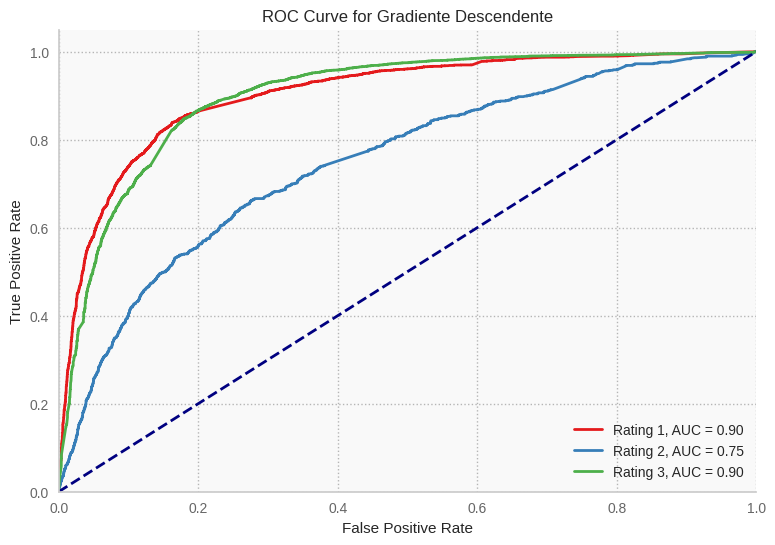

In [ ]:
gd = SGDClassifier(loss='log')
predict(gd, 'Gradiente Descendente')

# Testes

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
port = PorterStemmer()

In [ ]:
import re
corpus = []
for i in range(0,len(df)):
    rev = re.sub('[^a-zA-Z0-9]',' ',str(df['review_description'][i]))
    rev = rev.split()
    rev = [port.stem(word) for word in rev if not word in stopwords.words('english')]
    rev = ' '.join(rev)
    corpus.append(rev)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary=True)
X= cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(32910, 2500)

In [ ]:
y= df['rating']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train, y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 19657    3
 21098    1
 1842     3
 21253    3
 7028     1
         ..
 12363    3
 5695     1
 8006     3
 17745    1
 17931    1
 Name: rating, Length: 23037, dtype: int64)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = tv.fit_transform(corpus).toarray()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred_log = model.predict(X_test)

In [ ]:
score = accuracy_score(y_test, pred_log)
print(score)

0.8037070799149195


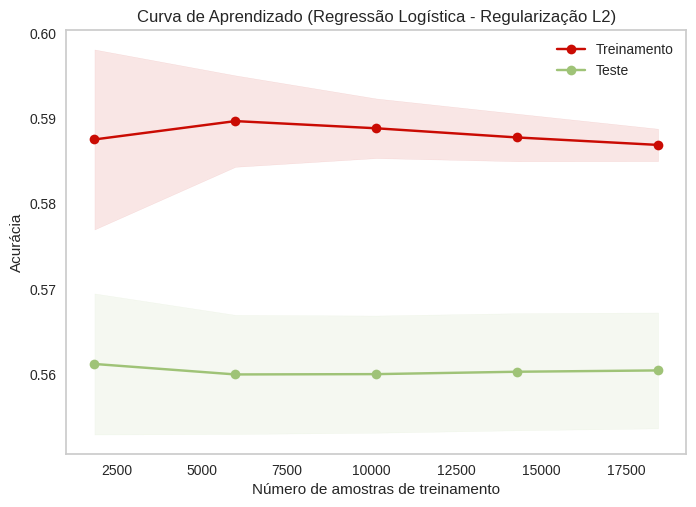

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Número de amostras de treinamento")
    plt.ylabel("Acurácia")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Teste")

    plt.legend(loc="best")
    return plt

# Define o modelo que você deseja avaliar, por exemplo, a regressão logística com regularização L1
model = model_l1

# Defina o título do gráfico
title = "Curva de Aprendizado (Regressão Logística - Regularização L2)"

# Plote a curva de aprendizado
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model, title, X_train_tfidf, y_train, cv=cv, n_jobs=-1)

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model = model_l2

def plot_learning_curves(model, X, y):
  X_train_tfidf, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")